Logistic Regression (3-class vs 2-class)
Apply Normalization on Dataset
Use this as a baseline.

Models:

**a)** 21 features, L2 reg, solver = 'lbfgs'  
**b)** 13 features, L2 reg, solver = 'lbfgs'

**c)** 21 features, L1 reg, solver = 'liblinear'  
**d)** 13 features, L1 reg, solver = 'liblinear'  

**e)** 21 features, L2 reg, solver = 'liblinear'  
**f)** 13 features, L2 reg, solver = 'liblinear'  

**g)** 21 features, L2 reg, solver='newton-cg',   
**h)** 13 features, L2 reg, solver='newton-cg  

**i)** 21 features, L1 reg, solver='saga',   
**j)** 13 features, L1 reg, solver='saga'  

Different:
1) optimization techniques
2) regularization (L2 vs L1 vs none) aka penalty
4) all predictors vs only uncorrelated ones
   
Measure:
1) accuracy (correct/total)
2) train time
3) AIC -> low is good
4) Confusion Matrix
5) ROC curve later (read up on it)

In [93]:
!git commit -m "Added Binary Logistic Regression Models with Stats"

[main af3b12c] Added Binary Logistic Regression Models with Stats
 5 files changed, 2122 insertions(+), 143 deletions(-)
 create mode 100644 .ipynb_checkpoints/Ariani_Binomial_Log_Reg-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/Ariani_Multinomial_Log_reg-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/varsha-checkpoint.ipynb


#### Standardize All Features
- Transform data, both categorical and continuous to be on same scale.. mean of 0 and standard deviation of 1... btwn [-1, 1]
- Aka z-score normalization
- Create Test and Training sets

In [7]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
print(df.head())
print(df.to_numpy())
print(df.shape)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#---------------- 21 Features Dataset -------------------

df_21 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

#numpy arrays
y_21 = df_21.iloc[ :, 0].values #target variable column... jus the first column
X_21 = df_21.iloc[ :, 1:].values #predictor variable columns... everything from the second to last column

# Train/test split
from sklearn.model_selection import train_test_split
X_train_21, X_test_21, y_train_21, y_test_21 = train_test_split(X_21, y_21, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_21 = scaler.fit_transform(X_train_21)
X_test_21 = scaler.fit_transform(X_test_21)

print(X_train_21.shape)
print(X_test_21.shape)

# ---------------- 13 Features Dataset ------------------------

df_13 = pd.read_csv('5050_clean_diabetes_dataset.csv')

#numpy arrays
y_13 = df_13.iloc[ :, 0].values #target variable column... jus the first column
X_13 = df_13.iloc[ :, 1:].values #predictor variable columns... everything from the second to last column

# Train/test split
from sklearn.model_selection import train_test_split
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_13 = scaler.fit_transform(X_train_13)
X_test_13 = scaler.fit_transform(X_test_13)

print(X_train_13.shape)
print(X_test_13.shape)

(56553, 21)
(14139, 21)
(56553, 14)
(14139, 14)


#### a) 21 features, L2 reg, solver = 'lbfgs'

Binary Logistic Regression (21 features) accuracy: 0.7475776221797864
Number Correct: 10570 out of 14139


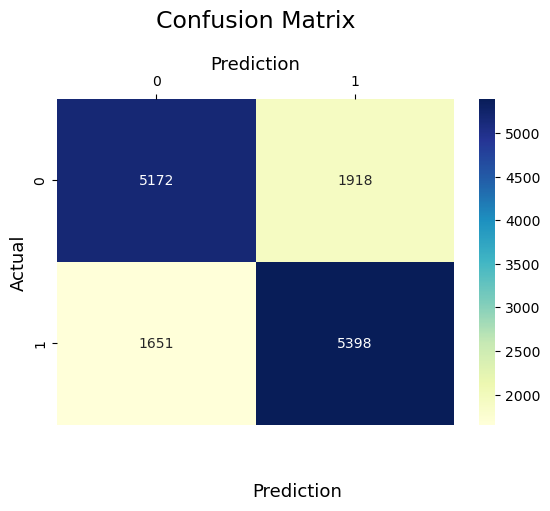

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns

BLR_a = LogisticRegression(
                    penalty='l2',
                    solver='lbfgs',
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_a = BLR_a.predict(X_test_21)

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Binary Logistic Regression (21 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_21)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_21, y_pred_a)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test, y_pred_a))
#-------------------plot----------------------

#Measure:
#3) AIC -> low is good
#4) Confusion Matrix
#5) ROC curve later (read up on it)


#### b) 13 features, L2 reg, solver = 'lbfgs'

Binary Logistic Regression (13 features) accuracy: 0.7435462196760733
Number Correct: 10513 out of 14139


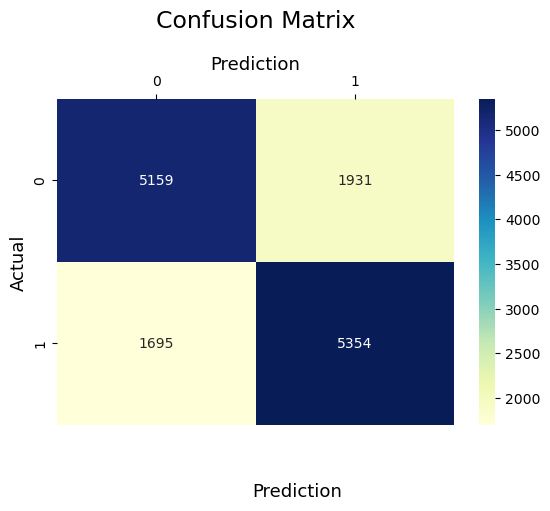

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      7090
           1       0.73      0.76      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [87]:
BLR_b = LogisticRegression(
                    penalty='l2',
                    solver='lbfgs',
                    random_state=42).fit(X_train_13, y_train_13)

y_pred_b = BLR_b.predict(X_test_13)


# accuracy
acc = accuracy_score(y_test, y_pred_b)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_13)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test_13, y_pred_b)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test, y_pred_b))


#### **c)** 21 features, L1 reg, solver = 'liblinear'  

Binary Logistic Regression (13 features) accuracy: 0.7478605276186435
Number Correct: 10574 out of 14139


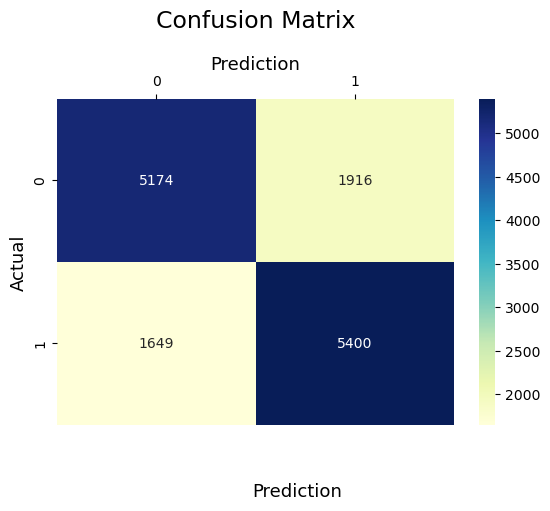

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [89]:
BLR_c = LogisticRegression(
                    penalty='l1',
                    solver='liblinear',
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_c = BLR_c.predict(X_test_21)


# accuracy
acc = accuracy_score(y_test, y_pred_c)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

# Number correct = accuracy * total samples
num_total = len(y_test_21)
num_correct = int(acc * num_total)

print(f"Number Correct: {num_correct} out of {num_total}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_c)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            cmap = 'YlGnBu',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

print(classification_report(y_test, y_pred_c))

#### **d)** 13 features, L1 reg, solver = 'liblinear' 

In [61]:
BLR_d = LogisticRegression(
                    penalty='l1',
                    solver='liblinear',
                    random_state=42).fit(X_train_13, y_train_13)

y_pred_d = BLR_d.predict(X_test_13)


# accuracy
acc = accuracy_score(y_test, y_pred_d)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

Binary Logistic Regression (13 features) accuracy: 0.7436169460357875


#### **e)** 21 features, L2 reg, solver = 'liblinear' 

In [62]:
BLR_e = LogisticRegression(
                    penalty='l2',
                    solver='liblinear',
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_e = BLR_e.predict(X_test_21)


# accuracy
acc = accuracy_score(y_test, y_pred_e)
print(f"Binary Logistic Regression (21 features) accuracy: {acc}")

Binary Logistic Regression (21 features) accuracy: 0.7478605276186435


#### **f)** 13 features, L2 reg, solver = 'liblinear'  

In [64]:
BLR_f = LogisticRegression(
                    penalty='l2',
                    solver='liblinear',
                    random_state=42).fit(X_train_13, y_train_13)

y_pred_f = BLR_f.predict(X_test_13)


# accuracy
acc = accuracy_score(y_test, y_pred_f)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

Binary Logistic Regression (13 features) accuracy: 0.7435462196760733


#### **g)** 21 features, L2 reg, solver='newton-cg'

In [66]:
BLR_g = LogisticRegression(
                    penalty='l2',
                    solver='newton-cg',
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_g = BLR_g.predict(X_test_21)


# accuracy
acc = accuracy_score(y_test, y_pred_g)
print(f"Binary Logistic Regression (21 features) accuracy: {acc}")

Binary Logistic Regression (21 features) accuracy: 0.7478605276186435


#### **h)** 13 features, L2 reg, solver='newton-cg  

In [67]:
BLR_h = LogisticRegression(
                    penalty='l2',
                    solver='newton-cg',
                    random_state=42).fit(X_train_13, y_train_13)

y_pred_h = BLR_h.predict(X_test_13)


# accuracy
acc = accuracy_score(y_test, y_pred_h)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

Binary Logistic Regression (13 features) accuracy: 0.7435462196760733


#### **i)** 21 features, L1 reg, solver='saga'   

In [69]:
BLR_i = LogisticRegression(
                    solver='saga',
                    penalty='elasticnet',
                    l1_ratio=0.5,
                    random_state=42).fit(X_train_21, y_train_21)

y_pred_i = BLR_i.predict(X_test_21)


# accuracy
acc = accuracy_score(y_test, y_pred_i)
print(f"Binary Logistic Regression (21 features) accuracy: {acc}")

Binary Logistic Regression (21 features) accuracy: 0.7478605276186435


#### **j)** 13 features, L1 reg, solver='saga'  

In [70]:
BLR_j = LogisticRegression(
                    solver='saga',
                    penalty='elasticnet',
                    l1_ratio=0.5,
                    random_state=42).fit(X_train_13, y_train_13)

y_pred_j = BLR_j.predict(X_test_13)


# accuracy
acc = accuracy_score(y_test, y_pred_j)
print(f"Binary Logistic Regression (13 features) accuracy: {acc}")

Binary Logistic Regression (13 features) accuracy: 0.7435462196760733


In [84]:
# AIC
import numpy as np

models = [BLR_a, BLR_b, BLR_c, BLR_d, BLR_e, BLR_f, BLR_g, BLR_h, BLR_i, BLR_j]
X_tests = [X_test_21, X_test_13, X_test_21, X_test_13, X_test_21, X_test_13, X_test_21, X_test_13, X_test_21, X_test_13]
y_tests = [y_test_21, y_test_13, y_test_21, y_test_13, y_test_21, y_test_13, y_test_21, y_test_13, y_test_21, y_test_13]

aic = []
accuracy = []

for i, model in enumerate(models):
    X_test = X_tests[i]
    y_test = y_tests[i]
    
    k = len(model.coef_.ravel()) + 1
    probs = model.predict_proba(X_test)[:, 1]
    probs = np.clip(probs, 1e-15, 1 - 1e-15)
    log_likelihood = np.sum(y_test * np.log(probs) + (1 - y_test) * np.log(1 - probs))
    AIC = 2 * k - 2 * log_likelihood
    
    acc = accuracy_score(y_test, model.predict(X_test))

    aic.append(AIC)
    accuracy.append(acc)
    
    print(f"Model {chr(ord('a') + i)}) Accuracy: {acc:.4f}, AIC: {AIC:.4f}")

lowest_aic = np.argmin(aic)
highest_accuracy = np.argmax(accuracy)

print("\n")
print("Lowest AIC Model:")
print(f"Model {chr(ord('a') + lowest_aic)}) AIC = {aic[lowest_aic]:.2f} and Accuracy = {accuracy[lowest_aic]:.4f}\n")
print("Highest Accuracy Model:")
print(f"Model {chr(ord('a') + highest_accuracy)}) AIC = {aic[highest_accuracy]:.2f} and Accuracy = {accuracy[highest_accuracy]:.4f}\n")

Model a) Accuracy: 0.7476, AIC: 14510.7898
Model b) Accuracy: 0.7435, AIC: 14662.6875
Model c) Accuracy: 0.7479, AIC: 14510.8793
Model d) Accuracy: 0.7436, AIC: 14662.6901
Model e) Accuracy: 0.7479, AIC: 14510.8752
Model f) Accuracy: 0.7435, AIC: 14662.7258
Model g) Accuracy: 0.7479, AIC: 14510.8417
Model h) Accuracy: 0.7435, AIC: 14662.7267
Model i) Accuracy: 0.7479, AIC: 14510.8716
Model j) Accuracy: 0.7435, AIC: 14662.7357


Lowest AIC Model:
Model a) AIC = 14510.79 and Accuracy = 0.7476

Highest Accuracy Model:
Model c) AIC = 14510.88 and Accuracy = 0.7479

